In [1]:
import loaders.cityprotect as cp

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
full_df = pd.read_pickle("SCCSheriff.pkl")

In [23]:
dept = "Los Altos Hills (SCC Sheriff)"

In [24]:
vc = full_df["inferredCity"].value_counts()

In [25]:
vc[vc > 100]

San Jose                  120930
Cupertino                  51517
Saratoga                   30051
no resolution              20402
Santa Clara                 9395
                           ...  
Chula Vista Avenue           105
Dougherty Avenue             105
Santa Teresa Boulevard       101
Gilman Road                  101
New Almaden                  101
Name: inferredCity, Length: 70, dtype: int64

In [26]:
df = full_df[full_df["inferredCity"] == "Los Altos Hills"]
#df=full_df

In [27]:
parentIncident_types = set([a.strip() for b in df['parentIncidentType'].str.split(';').values for a in b])

In [28]:
parentIncident_types

{'Assault',
 'Breaking & Entering',
 'Fire',
 'Other',
 'Proactive Policing',
 'Property Crime',
 'Quality of Life',
 'Sexual Offense',
 'Theft',
 'Theft from Vehicle',
 'Theft of Vehicle',
 'Traffic',
 'Vehicle Recovery'}

In [29]:
monthly = {k: df[df["parentIncidentType"] == k].groupby(pd.Grouper(key="date", freq="M"))
           for k in parentIncident_types}

In [30]:
monthly_df = pd.DataFrame({k: monthly[k].count()["ccn"] for k in parentIncident_types}).fillna(0)

In [31]:
monthly_df

,Theft,Breaking & Entering,Quality of Life,Fire,Theft from Vehicle,Assault,Theft of Vehicle,Other,Vehicle Recovery,Property Crime,Traffic,Proactive Policing,Sexual Offense
date,,,,,,,,,,,,,
2017-08-31,3.0,1,18,1,2.0,0.0,0.0,64,0.0,2.0,10,28,0.0
2017-09-30,14.0,3,25,0,2.0,0.0,0.0,67,0.0,3.0,14,50,0.0
2017-10-31,1.0,2,16,0,0.0,0.0,0.0,49,0.0,1.0,21,37,1.0
2017-11-30,5.0,6,10,0,1.0,0.0,1.0,49,0.0,2.0,11,28,0.0
2017-12-31,12.0,1,9,0,1.0,1.0,0.0,51,0.0,8.0,7,25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,2.0,5,15,1,0.0,0.0,0.0,85,0.0,3.0,12,2,1.0
2022-09-30,10.0,2,17,0,0.0,0.0,0.0,82,0.0,3.0,11,3,0.0
2022-10-31,4.0,7,19,0,0.0,0.0,0.0,74,0.0,2.0,8,1,0.0


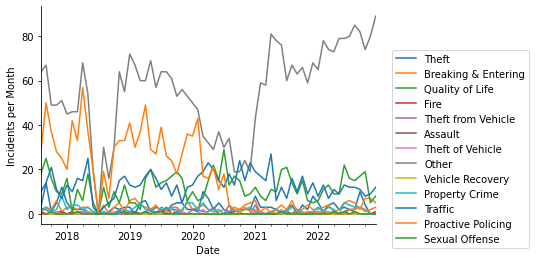

In [32]:
ax = monthly_df.plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [33]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft from Vehicle", "Theft"]

In [34]:
violent_list = ["Assault", "Robbery", "Sexual Offense"]

In [35]:
monthly_df.columns.intersection(violent_list)

Index(['Assault', 'Sexual Offense'], dtype='object')

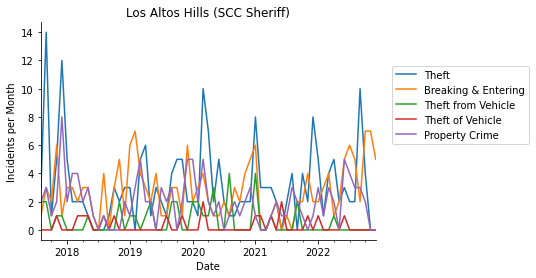

In [36]:
ax = monthly_df[monthly_df.columns.intersection(prop_list)].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
ax.set(title=dept)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()


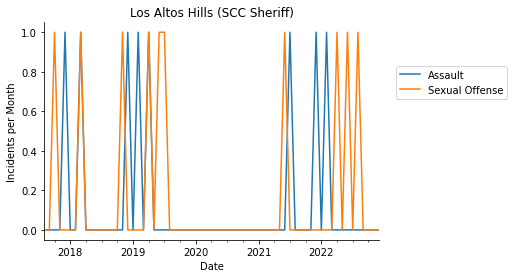

In [37]:
ax = monthly_df[monthly_df.columns.intersection(violent_list)].plot()
ax.set(xlabel="Date", ylabel="Incidents per Month")
ax.set(title=dept)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

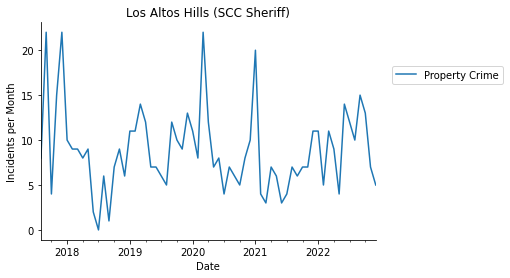

In [38]:
ax = monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1).plot(label="Property Crime")
ax.set(xlabel="Date", ylabel="Incidents per Month")
ax.set(title=dept)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [39]:
parentIncident_types

{'Assault',
 'Breaking & Entering',
 'Fire',
 'Other',
 'Proactive Policing',
 'Property Crime',
 'Quality of Life',
 'Sexual Offense',
 'Theft',
 'Theft from Vehicle',
 'Theft of Vehicle',
 'Traffic',
 'Vehicle Recovery'}

In [40]:
full_df[full_df["inferredCity"] == "unknown"]

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative,inferredCity
161860,S172210419,2017-08-10 01:58:28,2018-02-13 05:07:21,Santa Clara County,CA,NaN,NaN,FOUND PROPERTY,Property Crime,Call Type: FNDPRP <br>Description: FOUND PROPE...,unknown
162566,S172240183,2017-08-12 20:37:33,2018-02-13 04:04:28,Santa Clara County,CA,NaN,NaN,UNKNOWN TYPE 911 CALL,Other,Call Type: 911UNK <br>Description: UNKNOWN TYP...,unknown
165447,S172360064,2017-08-24 15:06:47,2018-02-13 18:36:21,SANTA CLARA COUNTY,CA,NaN,NaN,"VEHICLE ACCIDENT, PROPERTY DAMAGE",Traffic,Call Type: 1182 <br>Description: VEHICLE ACC...,unknown
157416,S172630247,2017-09-20 20:20:46,2018-02-13 04:55:33,Santa Clara County,CA,NaN,NaN,DISTURBANCE,Quality of Life,Call Type: 415 <br>Description: DISTURBANCE...,unknown
229975,S173420317,2017-12-08 23:53:43,2018-02-13 04:52:15,Santa Clara County,CA,NaN,NaN,WELFARE CHECK,Proactive Policing,Call Type: WELCK <br>Description: WELFARE CHE...,unknown
...,...,...,...,...,...,...,...,...,...,...,...
105814,S190340018,2019-02-03 08:34:17,2019-02-10 13:26:17,Santa Clara County,CA,NaN,NaN,VEHICLE STOP,Proactive Policing,Call Type: 1195 <br>Description: VEHICLE STO...,unknown
105815,S190340028,2019-02-03 09:10:17,2019-02-10 13:26:19,Santa Clara County,CA,NaN,NaN,VEHICLE STOP,Proactive Policing,Call Type: 1195 <br>Description: VEHICLE STO...,unknown
105497,S190350223,2019-02-04 21:37:05,2019-02-12 05:02:55,Santa Clara County,CA,NaN,NaN,USE/UI OF CONTROLLED SUBSTANCE,Quality of Life,Call Type: 11550 <br>Description: USE/UI OF C...,unknown
104196,S190400324,2019-02-10 03:24:02,2019-02-15 09:31:13,Santa Clara County,CA,NaN,NaN,UNKNOWN TYPE 911 CALL,Other,Call Type: 911UNK <br>Description: UNKNOWN TYP...,unknown
